## Unidade Básica de Saúde - UBS

As Unidades Básicas de Saúde (UBS), na grande maioria das cidades, é o primeiro nível de acesso ao Sistemas Único de Saúde (SUS) que a população tem contato, trabalhando, principalmente, com consultas médicas à população e tratamento básicos de saúde. Nesse sentido, o número de unidades presente em cada cidade, reflete diretamente na capcidade que cidade tem de cuidar da saúde dos seus moradores.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

df = pd.read_csv('https://raw.githubusercontent.com/Gabriel-datapy/Unidades_de_Saude_MG-/master/ubs_funcionamentonone.csv.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_clean = df[['lat','long','no_fantasia','cidade','uf']].dropna()
df_clean.columns = ['Latitude','Longitude','Nome UBS','Cidade','Estado'].copy()

df_clean.head()

,Latitude,Longitude,Nome UBS,Cidade,Estado
0,-21.132047,-42.361075,CENTRO DE SAUDE SANTA TEREZINHA,Muriaé,MG
1,-22.538527,-54.451268,UNIDADE SAUDE DA FAMILIA RURAL VILA RICA,Vicentina,MS
2,-13.687323,-39.474864,UNIDADE DE SAUDE DA FAMILIA DO ALIANCA,Wenceslau Guimarães,BA
3,-22.933263,-42.411625,PSF VILATUR,Saquarema,RJ
4,-8.360864,-40.358877,USF DE VILA SAO FRANCISCO,Santa Cruz,PE


In [3]:
#Determinando o número de UBS por estado

ubs_estados = df_clean['Estado'].value_counts()
ubs_estados.head()

MG    5105
SP    4765
BA    3679
PE    2398
PR    2307
Name: Estado, dtype: int64

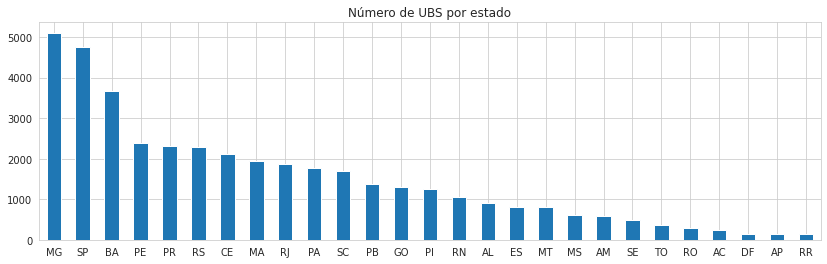

In [4]:
sns.set_style('whitegrid')
ubs_estados.plot.bar(figsize=(14,4),rot=0,title='Número de UBS por estado')

plt.show()

In [0]:
#Determinando o número de UBS por município do estado de Minas Gerais

ubs_MG = df_clean[df_clean['Estado']=='MG']
ubs_municipio = ubs_MG['Cidade'].value_counts()

ubs_municipio = ubs_municipio.to_frame()
ubs_municipio['Cidade'].sort_values()

ubs_20municipios = ubs_municipio['Cidade'].nlargest(20)

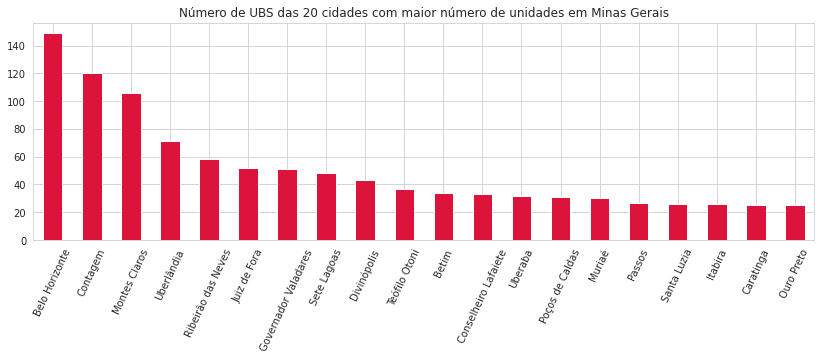

In [6]:
sns.set_style('whitegrid')
ubs_20municipios.plot.bar(figsize=(14,4),rot=65,color='crimson',
                          title='Número de UBS das 20 cidades com maior número de unidades em Minas Gerais')

plt.show()

In [0]:
# Inicialmente, para que possamos criar um mapa, pecisamos informar uma localizacao e o zoom, para o mapa aparecer corretamente na tela

minas_gerais = folium.Map(
    location=[-19.8157, -43.9542],
    zoom_start=6
)

#for _, ubs in ubs_MG.iterrows():
#    folium.Marker(
#        location=[ubs['Latitude'], ubs['Longitude']],
#        popup=ubs['Nome UBS']
#    ).add_to(minas_gerais)


## Mapa de UBS - Belo Horizonte

Se plotarmos todas as unidades de saúde no gráfico referente à todo estado, serão muitos pontos, o que dificultará a leitura do mapa. Por isso, vamos plotar os dados apenas para a cidade com mais UBS, que no caso é Belo Horizonte.

In [13]:
# Fazendo o mapa apenas para a cidade de Belo Horizonte

ubs_BH = ubs_MG[ubs_MG['Cidade']=='Belo Horizonte']

belo_horizonte = folium.Map(
    location=[-19.8157, -43.9542],
    zoom_start=11
)

for _, ubs in ubs_BH.iterrows():
    folium.Marker(
        location=[ubs['Latitude'], ubs['Longitude']],
        popup=ubs['Nome UBS']
    ).add_to(belo_horizonte)
    
belo_horizonte